In [1]:
from keras.models import Sequential
from keras import layers
import os,sys,shutil
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array



model = Sequential()

model.add(layers.Conv2D(16,(3,3), activation ='relu', input_shape = (200,200,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(32,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        73792     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 33856)            

In [2]:
model.compile(loss = 'binary_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])


In [3]:
base_dir = r'C:\Users\Sub\jupyter_workplace\face_img'

img_path = os.path.join(base_dir,'myface')

train_path = os.path.join(base_dir, 'train')
if(os.path.isdir(train_path) == False) :
    train_path = os.path.join(train_path, 'myface')
    os.mkdir(train_path)

validation_path = os.path.join(base_dir,'validation')
if(os.path.isdir(validation_path) == False) :
    validation_path = os.path.join(validation_path, 'myface')
    os.mkdir(validation_path)
    
test_path = os.path.join(base_dir,'test')
if(os.path.isdir(test_path) == False) :
    test_path = os.path.join(test_path, 'myface')
    os.mkdir(test_path)

img_lists = os.listdir(img_path)
for img_list in img_lists[:101] :
    img = os.path.join(img_path,img_list)
    shutil.copy(img, train_path)

for img_list in img_lists[101:126] :
    img = os.path.join(img_path,img_list)
    shutil.copy(img, validation_path)

for img_list in img_lists[126:] :
    img = os.path.join(img_path,img_list)
    shutil.copy(img, test_path)
print(train_path)
print(os.listdir(train_path))

C:\Users\Sub\jupyter_workplace\face_img\train
['1_IMG_1306.JPG', '1_KakaoTalk_20170123_151439371.jpg', '1_KakaoTalk_20170125_233812488.jpg', '1_KakaoTalk_20170125_233814065.jpg', '1_KakaoTalk_20200102_203745806_09.jpg', '1_KakaoTalk_20200103_104501398.jpg', '1_KakaoTalk_20200103_104946014_12.jpg', '1_KakaoTalk_20200103_111549310_06.jpg', '1_KakaoTalk_20200103_112142722_19.jpg', '1_KakaoTalk_20200103_124940397_19.jpg', '1_KakaoTalk_20200103_124940397_27.jpg', '1_KakaoTalk_20200103_124940397_29.jpg', '1_KakaoTalk_20200103_125433617_04.jpg', '1_KakaoTalk_20200103_125433617_22.jpg', '1_KakaoTalk_20200123_203856280_18.jpg', '1_KakaoTalk_20200123_203856280_19.jpg', '1_KakaoTalk_20200123_204124572_01.jpg', '1_KakaoTalk_20200123_204124572_11.jpg', '1_KakaoTalk_20200123_204124572_13.jpg', '1_KakaoTalk_20200123_204124572_14.jpg', '1_KakaoTalk_20200611_064437134.jpg', '1_KakaoTalk_20200611_064437134_01.jpg', '1_KakaoTalk_20200611_064437134_02.jpg', '1_KakaoTalk_20200611_064437134_04.jpg', '1_Kaka

In [4]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (200,200),
    batch_size = 2,
    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_path,
    target_size = (200,200),
    batch_size = 2,
    class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (200,200),
    batch_size = 2,
    class_mode = 'binary')



Found 101 images belonging to 1 classes.
Found 25 images belonging to 1 classes.
Found 26 images belonging to 1 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 100,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = 10)


Epoch 1/30
100/100 [==============================] - 26s 264ms/step - loss: 3.6778e-18 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/30
100/100 [==============================] - 25s 253ms/step - loss: 5.7816e-20 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/30
100/100 [==============================] - 25s 247ms/step - loss: 4.7369e-23 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/30
100/100 [==============================] - 25s 248ms/step - loss: 1.2474e-22 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/30
100/100 [==============================] - 25s 249ms/step - loss: 4.7259e-20 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/30
100/100 [==============================] - 25s 247ms/step - loss: 1.5162e-26 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/30
100/100 [==============================] - 25s 250ms/step - loss: 1.332

Loss :  0.00024506914317505406
Accuracy :  0.9996633

Validation_Loss :  4.879669013087214e-18
Validation_Accuracy :  1.0


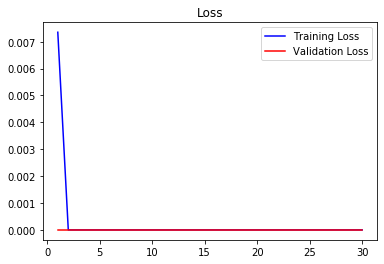

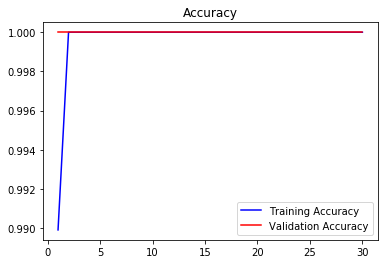

In [108]:
import matplotlib.pyplot as plt
import numpy as np

results = history.history

loss = results['loss']
acc = results['accuracy']

val_loss = results['val_loss']
val_acc = results['val_accuracy']


print("Loss : ",np.mean(loss))
print("Accuracy : ", np.mean(acc))
print()
print("Validation_Loss : ", np.mean(val_loss))
print("Validation_Accuracy : ", np.mean(val_acc))

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'b', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'b', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [110]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps = 20)
print("test_loss : ", test_loss)
print("test_acc : ", test_acc)

test_loss :  1.4288970538679063e-21
test_acc :  1.0


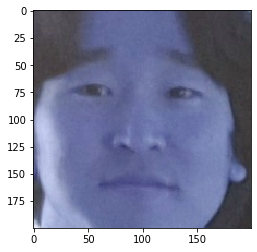

[[myface -> 0.00%]]


In [116]:
import cv2

img = cv2.imread('face.jpg',cv2.IMREAD_COLOR)
img2 = img
img = img.astype('float32') / 255
img = img.reshape((1,200,200,3))
pre = model.predict(img)

plt.imshow(img2)
plt.show()

np.set_printoptions(formatter={'float': lambda x: "myface -> {0:0.2f}%".format(x*100)})
print(pre)

In [126]:
import cv2

cascade_file = r"C:\Users\Sub\Anaconda3\envs\sub\Lib\site-packages\cv2\data\haarcascade_frontalface_default.xml"
face_classifier = cv2.CascadeClassifier(cascade_file)

def detecting_myface(img) :
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray,1.3,5)
    
    if faces is() :
        return img,[]
    
    for(x,y,w,h) in faces :
        cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,255),2)
        myface = img[y:y+h, x:x+w]
        myface = cv2.resize(myface , (200,200))
    return img, myface

In [127]:
import cv2

cap = cv2.VideoCapture(0)
count = 0
cap.set(3, 720)
cap.set(4, 1080)

while True :
    ret, frame = cap.read()
    image, face = detecting_myface(frame)
    
    try :
        face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
        result = model.predict(face)
        if result[1] < 500 :
            confidence = int(100*(1-(result[1])/300))
            display = str(confidence) + '%'
            
        cv2.putText(image, display, (100,120), cv2.FONT_HERSHEY_COMPLEX,1,(250,120,255),2)
        
    except :
        cv2.putText(image, "Face Not Found", (250, 450), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)
        cv2.imshow('Face Cropper', image)
        pass
    
    k = cv2.waitKey(1)
    if  k == 27 :
        break;
        
cap.release()

cv2.destroyAllWindows()

AttributeError: module 'cv2.cv2' has no attribute 'destoryAllWindows'